In this notebook I will try to create a composite map from our canny arrays

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import netCDF4 as nc
import cv2
import datetime
import xarray as xr
import os
plt.rcParams["figure.figsize"] = 10, 8
%matplotlib inline

#### Importação dos dados de Atlantic-Iberian Biscay Irish- Ocean Physics Reanalysis

Através da command line eu importei uma base de dados relativa a 2019 dos valores de SST de um dado programa do Copernicus. Trata-se de um ficheiro .nc (netCDF)

No entanto no futuro eu vou querer que o meu programa faça download diretamente dos dados num python script

In [3]:
current_path = os.getcwd()
current_path

'/home/luisfigueiredo/JUNO/notebooks'

In [6]:
from pathlib import Path

data_folder = os.path.join(current_path,"../data")
data_folder

'/home/luisfigueiredo/JUNO/notebooks/../data'

In [7]:
nc_path = os.path.join(data_folder, "IBI2017-2019.nc")
ds = nc.Dataset(nc_path)
data = xr.load_dataset(nc_path)

In [8]:
print(ds)     # informações relativas ao ficheiro netCDF

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.0
    source: CMEMS IBI-MFC
    institution: Puertos del Estado (PdE) - Mercator-Ocean (MO)
    references: http://marine.copernicus.eu
    title: CMEMS IBI REANALYSIS: DAILY PHYSICAL PRODUCTS 
    easting: longitude
    northing: latitude
    domain_name: IBI12
    FROM_ORIGINAL_FILE__field_type: mean
    field_date: 20191224
    FROM_ORIGINAL_FILE__longitude_min: -19.f
    FROM_ORIGINAL_FILE__longitude_max: 5.f
    FROM_ORIGINAL_FILE__latitude_min: 26.f
    FROM_ORIGINAL_FILE__latitude_max: 56.f
    z_min: 0.50576f
    z_max: 5698.061f
    contact: mailto: servicedesk.cmems@mercator-ocean.eu
    bulletin_date: 2020-12-01
    bulletin_type: Reanalysis
    _CoordSysBuilder: ucar.nc2.dataset.conv.CF1Convention
    comment: 
    history: Data extracted from dataset http://localhost:8080/thredds/dodsC/cmems_mod_ibi_phy_my_0.083deg-3D_P1D-m
    dimensions(sizes): time(1088

In [10]:
#Converter o ficheiro netCDF para uma dataframe
datadf = data.to_dataframe()
df2017_2019 = datadf.reset_index()

In [11]:
df2017_2019 = df2017_2019.drop(['depth'], axis=1)     #dropar coluna 'depth' (não é necessária pq é sempre igual)
df2017_2019   #os dados .nc estão agora no formato de uma dataframe

,latitude,longitude,time,thetao
0,35.0,-19.0,2017-01-01 12:00:00,17.324001
1,35.0,-19.0,2017-01-02 12:00:00,17.480000
2,35.0,-19.0,2017-01-03 12:00:00,17.637001
3,35.0,-19.0,2017-01-04 12:00:00,17.789001
4,35.0,-19.0,2017-01-05 12:00:00,17.867001
...,...,...,...,...
22248507,45.0,-5.0,2019-12-20 12:00:00,13.619000
22248508,45.0,-5.0,2019-12-21 12:00:00,13.559000
22248509,45.0,-5.0,2019-12-22 12:00:00,13.458000
22248510,45.0,-5.0,2019-12-23 12:00:00,13.400000


In [12]:
df2017_2019 = df2017_2019[['time', 'latitude', 'longitude', 'thetao']]    #reorganizar as colunas da dataframe
df2017_2019

,time,latitude,longitude,thetao
0,2017-01-01 12:00:00,35.0,-19.0,17.324001
1,2017-01-02 12:00:00,35.0,-19.0,17.480000
2,2017-01-03 12:00:00,35.0,-19.0,17.637001
3,2017-01-04 12:00:00,35.0,-19.0,17.789001
4,2017-01-05 12:00:00,35.0,-19.0,17.867001
...,...,...,...,...
22248507,2019-12-20 12:00:00,45.0,-5.0,13.619000
22248508,2019-12-21 12:00:00,45.0,-5.0,13.559000
22248509,2019-12-22 12:00:00,45.0,-5.0,13.458000
22248510,2019-12-23 12:00:00,45.0,-5.0,13.400000


In [13]:
#Df com dados relativos a um dia específico (neste caso 25 Setembro)
dia25 = df2017_2019[df2017_2019['time'] == '2019-09-25 12:00:00']
dia25

,time,latitude,longitude,thetao
997,2019-09-25 12:00:00,35.0,-19.000000,22.527000
2085,2019-09-25 12:00:00,35.0,-18.916666,22.516001
3173,2019-09-25 12:00:00,35.0,-18.833334,22.648001
4261,2019-09-25 12:00:00,35.0,-18.750000,22.809002
5349,2019-09-25 12:00:00,35.0,-18.666666,22.910000
...,...,...,...,...
22244069,2019-09-25 12:00:00,45.0,-5.333334,19.063999
22245157,2019-09-25 12:00:00,45.0,-5.250000,19.021999
22246245,2019-09-25 12:00:00,45.0,-5.166667,18.996000
22247333,2019-09-25 12:00:00,45.0,-5.083334,19.000999


In [14]:
#Df com dados relativos a um dia específico (neste caso 25 Setembro)
dia26 = df2017_2019[df2017_2019['time'] == '2019-09-26 12:00:00']
dia26

,time,latitude,longitude,thetao
998,2019-09-26 12:00:00,35.0,-19.000000,22.477001
2086,2019-09-26 12:00:00,35.0,-18.916666,22.535000
3174,2019-09-26 12:00:00,35.0,-18.833334,22.711000
4262,2019-09-26 12:00:00,35.0,-18.750000,22.859001
5350,2019-09-26 12:00:00,35.0,-18.666666,22.924999
...,...,...,...,...
22244070,2019-09-26 12:00:00,45.0,-5.333334,18.885000
22245158,2019-09-26 12:00:00,45.0,-5.250000,18.834999
22246246,2019-09-26 12:00:00,45.0,-5.166667,18.810001
22247334,2019-09-26 12:00:00,45.0,-5.083334,18.831001


In [15]:
def canny_creation(df, Tmax):
    
    """
    Função que pega numa df com temperaturas relativas a um certo dia e retorna a matriz obtida através do Canny
    """
    
    #Pegar na df dum dia e converte-la num np array com os valores de Temperatura para os valores de long e lati
    Temp = df.pivot_table(index='longitude', columns='latitude', values='thetao').T.values
    
    #Converter os valores de temperatura no formato uint8 com valores entre 0-255
    Temp_day = ((Temp - np.nanmin(Temp)) * (1/(np.nanmax(Temp) - np.nanmin(Temp)) * 255)).astype('uint8')

    Temp_day = np.flipud(Temp_day)   #flipud -> Reverse the order of elements along axis 0 (up/down).
    
    #apply the canny algorithm and plot the image with the edges
    canny = cv2.Canny(Temp_day, Tmax/2, Tmax, L2gradient=False, apertureSize=3)
    
    mask = np.isnan(np.flipud(Temp))    #Boolean array é True onde o array original (Temp) tinha valores Nan
    mask255 =np.where(mask,(np.ones(mask.shape))*255,0).astype("uint8")   #array cujos pixels= 255 quando mask=True
    #Fazer uma dilatação para assegurar que os pixeis que pertencem à costa não são considerados como frentes no canny
    kernel = np.ones((3,3), np.uint8)
    mask_dilated = cv2.dilate(mask255, kernel)
    canny =np.ma.masked_where(mask_dilated==255, canny)
    
    return canny

In [16]:
Tmax=180
#Pegar na df dum dia e converte-la num np array com os valores de Temperatura para os valores de long e lati
Temp = dia25.pivot_table(index='longitude', columns='latitude', values='thetao').T.values
    
#Converter os valores de temperatura no formato uint8 com valores entre 0-255
Temp_day = ((Temp - np.nanmin(Temp)) * (1/(np.nanmax(Temp) - np.nanmin(Temp)) * 255)).astype('uint8')

Temp_day = np.flipud(Temp_day)   #flipud -> Reverse the order of elements along axis 0 (up/down).
    
#apply the canny algorithm and plot the image with the edges
canny = cv2.Canny(Temp_day, Tmax/2, Tmax, L2gradient=False, apertureSize=7)
    
mask = np.isnan(np.flipud(Temp))    #Boolean array é True onde o array original (Temp) tinha valores Nan
mask255 =np.where(mask,(np.ones(mask.shape))*255,0).astype("uint8")   #array cujos pixels= 255 quando mask=True
#Fazer uma dilatação para assegurar que os pixeis que pertencem à costa não são considerados como frentes no canny
kernel = np.ones((3,3), np.uint8)
mask_dilated = cv2.dilate(mask255, kernel)
canny =np.ma.masked_where(mask_dilated==255, canny)
    

In [17]:
canny_25 = canny_creation(dia25, 180)
canny_25

masked_array(
  data=[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., --, --, --],
        [0, 0, 0, ..., --, --, --],
        [0, 0, 0, ..., --, --, --]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_value=999999,
  dtype=uint8)

In [20]:
canny_26 = canny_creation(dia26, 180)
canny_26.shape

(121, 169)

(40.0, 80.0)

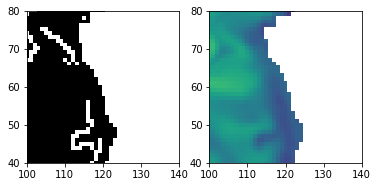

In [78]:
# Para analisar resolução
plt.subplot(1,2,1)

plt.imshow(canny_26, 'gray')
plt.xlim([100, 140])
plt.ylim([40, 80])

plt.subplot(1,2,2)

plt.imshow(np.flipud(dia26.pivot_table(index='longitude', columns='latitude', values='thetao').T.values))
plt.xlim([100, 140])
plt.ylim([40, 80])

### Código para Dividir a dataframe consoante a data

A base de dados sera dividida conforme o dia e depois será aplicada a função canny_creation sobre os dias que se quiser de forma a criar mapas de frontal probability para diferentes epocas do ano

In [23]:
df2017_2019    #dataframe com os dados desde 2017 a 2019

,time,latitude,longitude,thetao
0,2017-01-01 12:00:00,35.0,-19.0,17.324001
1,2017-01-02 12:00:00,35.0,-19.0,17.480000
2,2017-01-03 12:00:00,35.0,-19.0,17.637001
3,2017-01-04 12:00:00,35.0,-19.0,17.789001
4,2017-01-05 12:00:00,35.0,-19.0,17.867001
...,...,...,...,...
22248507,2019-12-20 12:00:00,45.0,-5.0,13.619000
22248508,2019-12-21 12:00:00,45.0,-5.0,13.559000
22248509,2019-12-22 12:00:00,45.0,-5.0,13.458000
22248510,2019-12-23 12:00:00,45.0,-5.0,13.400000


In [24]:
dataf2017_2019 = df2017_2019.copy()

In [29]:
specificday = [pd.Timestamp(dd).strftime("%Y-%m-%d %H:%M:%S") for dd in dataf2017_2019['time'].unique()]

In [30]:
specificday = np.array(specificday, dtype=np.object)

In [31]:
specificday      #specificday é um array com todos os dias diferentes da dataframe dataf2017_2019

array(['2017-01-01 12:00:00', '2017-01-02 12:00:00',
       '2017-01-03 12:00:00', ..., '2019-12-22 12:00:00',
       '2019-12-23 12:00:00', '2019-12-24 12:00:00'], dtype=object)

In [32]:
#create a data frame dictionary to store your data frames
df = {elem : pd.DataFrame for elem in specificday}

for key in df.keys():
    df[key] = dataf2017_2019[:][dataf2017_2019['time'] == key]

In [252]:
ond2017 = specificday[(specificday>='2017-10-01 12:00:00') & (specificday <= '2017-12-31 12:00:00')]
ond2017

array(['2017-10-01 12:00:00', '2017-10-02 12:00:00',
       '2017-10-03 12:00:00', '2017-10-04 12:00:00',
       '2017-10-05 12:00:00', '2017-10-06 12:00:00',
       '2017-10-07 12:00:00', '2017-10-08 12:00:00',
       '2017-10-09 12:00:00', '2017-10-10 12:00:00',
       '2017-10-11 12:00:00', '2017-10-12 12:00:00',
       '2017-10-13 12:00:00', '2017-10-14 12:00:00',
       '2017-10-15 12:00:00', '2017-10-16 12:00:00',
       '2017-10-17 12:00:00', '2017-10-18 12:00:00',
       '2017-10-19 12:00:00', '2017-10-20 12:00:00',
       '2017-10-21 12:00:00', '2017-10-22 12:00:00',
       '2017-10-23 12:00:00', '2017-10-24 12:00:00',
       '2017-10-25 12:00:00', '2017-10-26 12:00:00',
       '2017-10-27 12:00:00', '2017-10-28 12:00:00',
       '2017-10-29 12:00:00', '2017-10-30 12:00:00',
       '2017-10-31 12:00:00', '2017-11-01 12:00:00',
       '2017-11-02 12:00:00', '2017-11-03 12:00:00',
       '2017-11-04 12:00:00', '2017-11-05 12:00:00',
       '2017-11-06 12:00:00', '2017-11-07 12:0

In [253]:
len(ond2017)

92

In [254]:
#Crio um array canny com as dimensões (121, 169) apenas com zeros. 
#Depois para cada dia aplico a função canny_creation e somo esses valores ao array canny

canny = np.zeros((121,169))
for days in ond2017:
    canny = canny + canny_creation(df[days], 180)

In [255]:
#queremos que os valores do canny correspondam à prob de ocorrência de frente em cada pixel para o periodo em questão
canny = canny/(len(ond2017)*255)*100

In [256]:
canny.max()

60.86956521739131

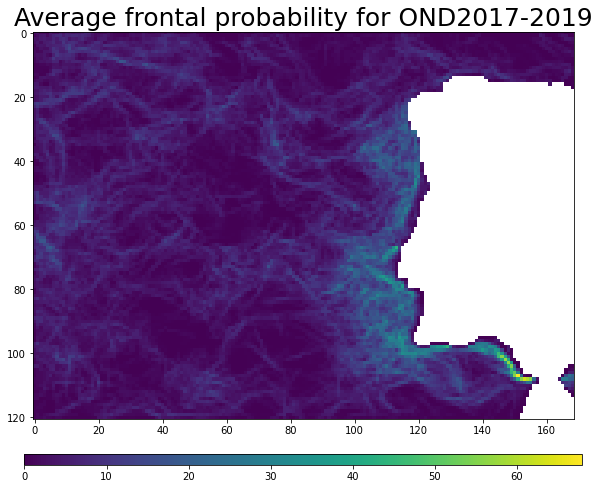

In [85]:
plt.rcParams["figure.figsize"] = 10, 8
img = plt.imshow(canny)
plt.colorbar(img, orientation='horizontal', fraction=0.03, pad=0.08, aspect=50)
plt.title("Average frontal probability for OND2017-2019", fontsize=25)
plt.show()

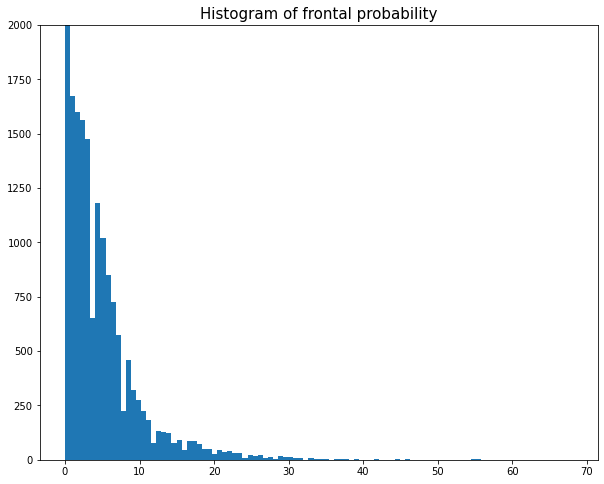

In [84]:
plt.hist(canny.flatten(), bins=100);
plt.title('Histogram of frontal probability', fontsize=15)
plt.rcParams["figure.figsize"] = 10, 8
plt.ylim([0, 2000]);

# ---------------------------------------------------------------------------------------------------
### Outra forma: fazer tudo como antes e só no canny final aplicar a mascara

Para fazer isto comentei toda a parte da mask na função canny_creation e só depois de fazer as médias dos pixeis dos cannys para cada dia é que apliquei a parte da mask e da dilatação.

In [237]:
mask = np.isnan(np.flipud(Temp))
mask255 =np.where(mask,(np.ones(mask.shape))*255,0).astype("uint8")
kernel = np.ones((3,3), np.uint8)
mask_dilated = cv2.dilate(mask255, kernel)
canny =np.ma.masked_where(mask_dilated==255, canny)

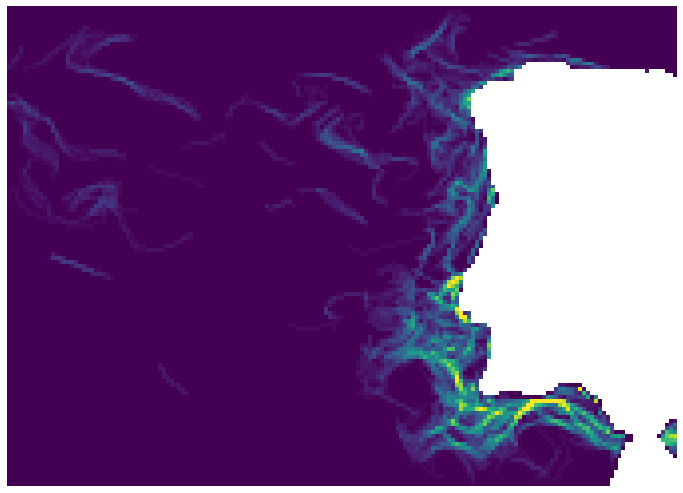

In [238]:
plt.rcParams["figure.figsize"] = 12,12
plt.imshow(canny, vmax=0.4)    #'gray'-> parametro para por a preto e branco
plt.axis('off');

Os resultados são iguais quer se aplique a mascara no inicio a cada array ou só no canny final
# ----------------------------------------------------------------------------------------

### Aplicar um gaussian Blur previamente para tentar melhorar visualização

In [86]:
from scipy.ndimage import gaussian_filter

In [87]:
def canny_creation_gaussianFilter(df, Tmax):
    
    """
    Função que pega numa df com temperaturas relativas a um certo dia e retorna a matriz obtida através do Canny 
    com a aplicação previa de um Gaussian Filter
    """
    
    #Pegar na df dum dia e converte-la num np array com os valores de Temperatura para os valores de long e lati
    Temp = df.pivot_table(index='longitude', columns='latitude', values='thetao').T.values
    
    #Converter os valores de temperatura no formato uint8 com valores entre 0-255
    Temp_day = ((Temp - np.nanmin(Temp)) * (1/(np.nanmax(Temp) - np.nanmin(Temp)) * 255)).astype('uint8')

    Temp_day = np.flipud(Temp_day)   #flipud -> Reverse the order of elements along axis 0 (up/down).
    
    Temp_day = gaussian_filter(Temp_day, sigma=1)   #apply gaussian filter to blur image 
    
    #apply the canny algorithm and plot the image with the edges
    canny_blur = cv2.Canny(Temp_day, Tmax/2, Tmax, L2gradient=False, apertureSize=3)
    
    mask = np.isnan(np.flipud(Temp))    #Boolean array é True onde o array original (Temp) tinha valores Nan
    mask255 =np.where(mask,(np.ones(mask.shape))*255,0).astype("uint8")   #array cujos pixels= 255 quando mask=True
    #Fazer uma dilatação para assegurar que os pixeis que pertencem à costa não são considerados como frentes no canny
    kernel = np.ones((3,3), np.uint8)
    mask_dilated = cv2.dilate(mask255, kernel)
    canny_blur =np.ma.masked_where(mask_dilated==255, canny_blur)
    
    return canny_blur

In [257]:
#Crio um array canny com as dimensões (121, 169) apenas com zeros. 
#Depois para cada dia aplico a função canny_creation_gaussianFilter e somo esses valores ao array canny

canny_blur = np.zeros((121,169))
for days in ond2017:
    canny_blur = canny_blur + canny_creation_gaussianFilter(df[days], 180)

In [258]:
# tenho de dividir por este valor pelo nr de dias em questão
canny_blur = canny_blur/(len(ond2017)*255)*100 

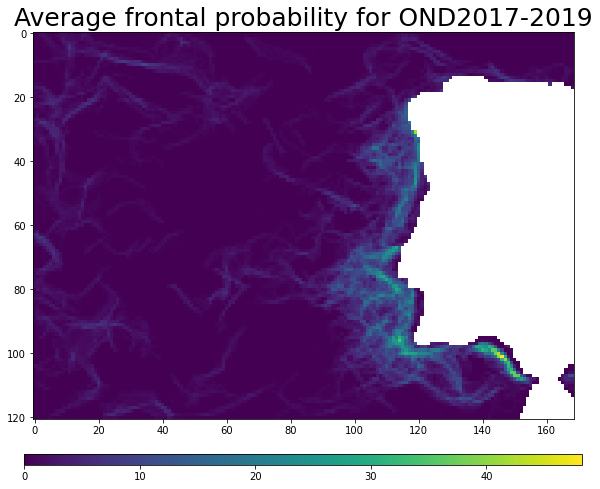

In [95]:
plt.rcParams["figure.figsize"] = 10, 8
img_blur = plt.imshow(canny_blur)
plt.colorbar(img_blur, orientation='horizontal', fraction=0.03, pad=0.08, aspect=50)
plt.title("Average frontal probability for OND2017-2019", fontsize=25)
plt.show()

In [ ]:
#atenção que as colorbars não estão sempre na mesma escala

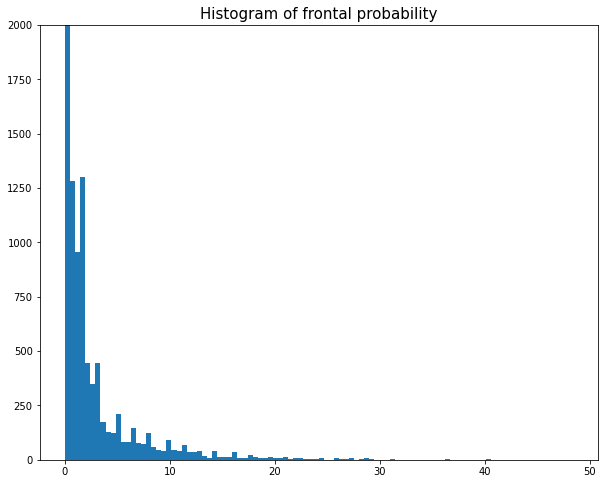

In [94]:
plt.hist(canny_blur.flatten(), bins=100);
plt.title('Histogram of frontal probability', fontsize=15)
plt.rcParams["figure.figsize"] = 10, 8
plt.ylim([0, 2000]);

#### Differences between applying or not a Gaussian Filter

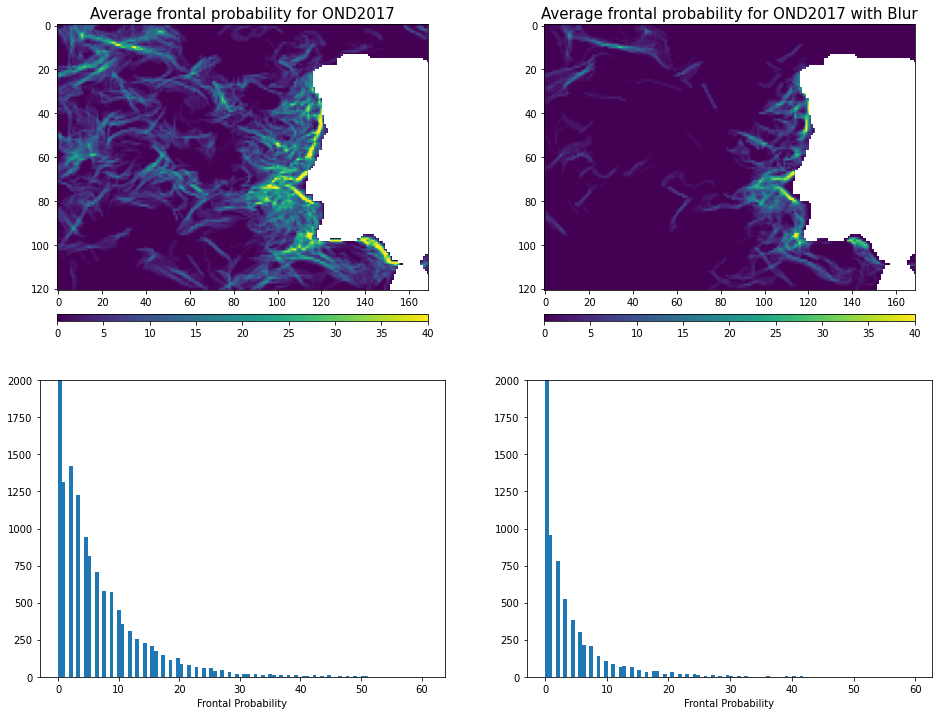

In [260]:

plt.rcParams["figure.figsize"] = 16, 12
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
img = ax1.imshow(canny, vmax=40) 
plt.colorbar(img, orientation='horizontal', fraction=0.025, pad=0.08, aspect=50)
plt.title("Average frontal probability for OND2017", fontsize=15)

ax2 = fig.add_subplot(2,2,2)
img_blur = ax2.imshow(canny_blur, vmax=40) 
plt.colorbar(img_blur, orientation='horizontal', fraction=0.025, pad=0.08, aspect=50)
plt.title("Average frontal probability for OND2017 with Blur", fontsize=15)

ax2 = fig.add_subplot(2,2,3)
ax2.hist(canny.flatten(), bins=100);
plt.xlabel('Frontal Probability',fontsize=10)
plt.ylim([0, 2000]);

ax2 = fig.add_subplot(2,2,4)
ax2.hist(canny_blur.flatten(), bins=100); 
plt.xlabel('Frontal Probability',fontsize=10)
plt.ylim([0, 2000]);


### Aplicar variação do threshold diretamente na imagem já com as masks aplicadas

In [41]:
def preprocessing(df):
    
    
    #Pegar na df dum dia e converte-la num np array com os valores de Temperatura para os valores de long e lati
    Temp = df.pivot_table(index='longitude', columns='latitude', values='thetao').T.values
    
    #Converter os valores de temperatura no formato uint8 com valores entre 0-255
    Temp_day = ((Temp - np.nanmin(Temp)) * (1/(np.nanmax(Temp) - np.nanmin(Temp)) * 255)).astype('uint8')

    Temp_day = np.flipud(Temp_day)   #flipud -> Reverse the order of elements along axis 0 (up/down).

    
    return Temp_day

In [42]:

canny2 = np.zeros((121,169))
for days in ond2017_2019:
    canny2 = canny2 + preprocessing(df[days])

In [43]:
canny2 = canny2/len(ond2017_2019)
canny2

array([[ 79.94052045,  78.59851301,  77.32342007, ...,  75.27881041,
         75.20446097,  75.9070632 ],
       [ 81.50929368,  80.34200743,  78.60966543, ...,  76.44981413,
         77.11152416,  78.37174721],
       [ 81.08550186,  80.73605948,  79.41635688, ...,  76.56505576,
         78.0260223 ,  80.04460967],
       ...,
       [225.20446097, 226.16356877, 226.89962825, ...,   0.        ,
          0.        ,   0.        ],
       [226.32342007, 227.15241636, 227.98141264, ...,   0.        ,
          0.        ,   0.        ],
       [226.98513011, 227.66171004, 228.48698885, ...,   0.        ,
          0.        ,   0.        ]])

In [44]:
canny2 = canny2.astype('uint8')
canny2

array([[ 79,  78,  77, ...,  75,  75,  75],
       [ 81,  80,  78, ...,  76,  77,  78],
       [ 81,  80,  79, ...,  76,  78,  80],
       ...,
       [225, 226, 226, ...,   0,   0,   0],
       [226, 227, 227, ...,   0,   0,   0],
       [226, 227, 228, ...,   0,   0,   0]], dtype=uint8)

In [45]:
from IPython.display import display
from IPython.html.widgets import interact, fixed

#cbarkw = dict(shrink=0.73, extend='both')

def canny_threshold(image, threshold=70, ratio=2, ksize=3):
    
    detected_edges = cv2.Canny(canny2, threshold,
                               threshold*ratio,
                               apertureSize=ksize)
    # Just add some colours to edges from original data.
    mask = np.ma.masked_equal(detected_edges, 0).mask
    img = np.ma.masked_array(canny2, mask)
    
    mask2 = np.isnan(np.flipud(Temp))    #Boolean array é True onde o array original (Temp) tinha valores Nan
    mask255 =np.where(mask2,(np.ones(mask2.shape))*255,0).astype("uint8")   #array cujos pixels= 255 quando mask=True
    #Fazer uma dilatação para assegurar que os pixeis que pertencem à costa não são considerados como frentes no canny
    kernel = np.ones((3,3), np.uint8)
    mask_dilated = cv2.dilate(mask255, kernel)
    detected_edges =np.ma.masked_where(mask_dilated==255, detected_edges)
    
    fig, ax = plt.subplots(figsize=(10,8))
    cs = ax.imshow(img)
    #cbar = fig.colorbar(cs, ax=ax, **cbarkw)
    ax.axis('off')
    plt.show()

lims = (0, 100)
w = interact(canny_threshold, threshold=lims,
             image=fixed(canny2),
             ratio=fixed(3), ksize=fixed(3))

display(w)

C:\Users\asus\anaconda3\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


interactive(children=(IntSlider(value=70, description='threshold'), Output()), _dom_classes=('widget-interact'…

<function __main__.canny_threshold(image, threshold=70, ratio=2, ksize=3)>